## Climate Change - Global Temperature

### EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_city = pd.read_csv('data/GlobalLandTemperaturesByCity.csv')
df_city.head(20)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [6]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


### Data Cleaning

In [7]:
df_city.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [8]:
364130/len(df_city['AverageTemperature'])

0.04234457761943769

In [9]:
364130/len(df_city['AverageTemperatureUncertainty'])

0.04234457761943769

Drop the NaNs for Average Temperature and Average Temperature Unvertainty

In [10]:
df_city.dropna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E


In [11]:
df_Viet = df_city[ df_city['Country'] == 'Vietnam' ]

In [12]:
df_Viet.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
512220,1825-01-01,25.025,2.364,Bac Lieu,Vietnam,8.84N,106.22E
512221,1825-02-01,24.737,1.363,Bac Lieu,Vietnam,8.84N,106.22E
512222,1825-03-01,26.120,1.966,Bac Lieu,Vietnam,8.84N,106.22E
512223,1825-04-01,27.892,2.189,Bac Lieu,Vietnam,8.84N,106.22E
512224,1825-05-01,28.190,1.278,Bac Lieu,Vietnam,8.84N,106.22E


In [13]:
df_Viet = df_Viet.drop(['City', 'Country', 'Latitude', 'Longitude'], axis = 1)
df_Viet.head()

,dt,AverageTemperature,AverageTemperatureUncertainty
512220,1825-01-01,25.025,2.364
512221,1825-02-01,24.737,1.363
512222,1825-03-01,26.120,1.966
512223,1825-04-01,27.892,2.189
512224,1825-05-01,28.190,1.278


In [14]:
df_Viet.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,62221.000000,62221.000000
mean,24.846825,0.687817
std,3.860668,0.510535
min,9.324000,0.058000
25%,23.216000,0.320000
50%,25.985000,0.488000
75%,27.603000,0.946000
max,31.972000,4.556000


In [15]:
print (df_Viet['dt'].max())
print (df_Viet['dt'].min())

2013-09-01
1825-01-01


Now we have a dataframe for Vietnam that includes temperatures from 1825 to 2013.
We can visualize the temperature trend by plotting some visualizations.

### Line plot

Text(0, 0.5, 'Temperature (°C)')

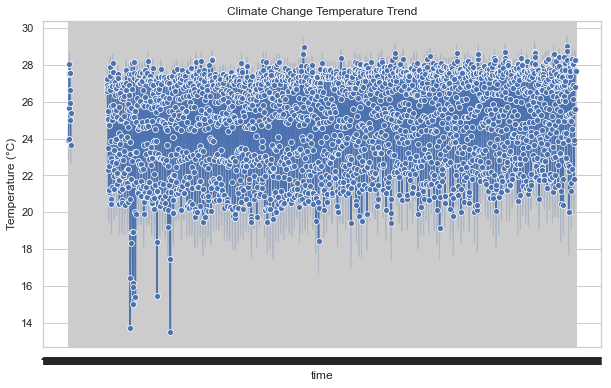

In [16]:
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(x=df_Viet['dt'], y=df_Viet['AverageTemperature'], marker='o')  # Create the line plot
plt.title("Climate Change Temperature Trend")
plt.xlabel("time")
plt.ylabel("Temperature (°C)")

### Scatter plot with a trendline

In [17]:


# Fit a linear regression line to the data
slope, intercept = np.polyfit(df_Viet['dt'], df_Viet['AverageTemperature'], 1)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create a scatter plot with trend line
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(x='dt', y='AverageTemperature', data=df_Viet, color='blue', marker='o')  # Create the scatter plot

# Plot the linear regression line
x_fit = np.array([min(df_Viet['dt']), max(df_Viet['dt'])])
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='red', linestyle='--')

# Add the trend line equation as annotation
plt.annotate(line_eq, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red')

plt.title("Climate Change Temperature Trend")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")

plt.show()  # Show the plot



TypeError: can only concatenate str (not "float") to str